# QUESTION 1: Amazing Holiday Sets [10 marks]

QUESTION 1: Amazing Holiday Sets [10 marks]
Year-end school holiday is coming soon. A kindergarten teacher would like to give each of the student in her class, an amazing holiday set by November 2023. There are 25 students in her class consisting of 15 girls and 10 boys. She has approached you for help and provided the following details to you:

**• Budget for 25 holiday sets = RM 200.00 <br>
• Each holiday set must be wrapped using a sheet of paper i.e. blue wrapper for boy’s holiday set and pink wrapper for girl’s holiday set. Each wrapper cost RM1.00 <br>
• Each holiday set should have at least 2 items being stationery**

The following is her list of choice of items to be packed as part of holiday set and their
prices per unit.

| No | Item              | Price Per Unit (RM) |
|----|-------------------|---------------------|
| 1  | Chipsmore Biscuit | 2.00                |
| 2  | 2B Pencil         | 1.00                |
| 3  | Color Pencil      | 3.00                |
| 4  | Magic Pen         | 3.00                |
| 5  | Potato Chip       | 2.00                |
| 6  | Milo Packet       | 1.00                |
| 7  | Mini Sketch Book  | 2.00                |
| 8  | Milk Biscuit      | 3.00                |

Solve the above scenario using Genetic Algorithm (GA). Display the total combination
of items and the content of the combination of items. You should also modify and
compare at least 2 methods for selection, crossover, and mutation.

In [2]:
pip install pygad

Note: you may need to restart the kernel to use updated packages.


In [137]:
import random
import pygad
import numpy as np
import matplotlib.pyplot as plt

#choices of items
items = {"Chipsmore Biscuit": 2.00,
         "2B Pencil": 1.00,
         "Color Pencil": 3.00,
         "Magic Pen": 3.00,
         "Potato Chip": 2.00,
         "Milo Packet": 1.00,
         "Mini Sketch Book": 2.00,
         "Milk Biscuit": 3.00}

BUDGET = 175.00 #budget per student is (200-25 wraps)
MIN_STATIONARY = 2
POP_SIZE = 15
CHOICES = len(items)
WRAP_COST = 25.00 #RM1.00 * 25 students
NUM_OF_STUDENTS = 25

In [155]:
#fitness function
def fitness_function(ga_instance,solution,solution_idx):
    #individual is arr of binary. 0 if item is not chosen, 1 if item is chosen
    #get item index of chosen items (1) in individual
    itemIndex = np.nonzero(solution)[0] 
    #handle in case where individual is [0,0,0,0,0,0,0,0]
    if len(itemIndex) == 0:
        fitness = 0
    
    individualCost = 0
    stationaryCount = 0
    for index in itemIndex:
        #create list of name of items, retrive item's name at position index
        itemName = list(items.keys())[index]
        #add price of item to individualCost
        individualCost += items[itemName]
        if itemName in ["2B Pencil", "Color Pencil", "Magic Pen", "Mini Sketch Book"]:
            stationaryCount += 1
    
    totalCost = individualCost * NUM_OF_STUDENTS #times 25 students
    
    if stationaryCount >= MIN_STATIONARY:
        if totalCost <= BUDGET:
            fitness = totalCost 
        else:
            fitness = BUDGET - totalCost #produces negative fitness value
    else:
        fitness = 0 #individual have less than 2 stationary items

    return fitness

In [156]:
#print best solution
def printBestSol(bestSol):
    combination = []
    for gene, (itemName,itemPrice) in zip (bestSol[0],items.items()):
        if gene == 1:
            combination.append((itemName, itemPrice))
    totalCost = bestSol[1]
    return "Items:", combination, " SumPrice=", totalCost/NUM_OF_STUDENTS, " TotalCost=", totalCost+WRAP_COST

#print by fitness value
def printSolutions(population,ga_instance):
    fitness_values = []
    for i, individual in enumerate(population):
        combination = [] #store individual's info in combination arr
        for gene, (itemName, itemPrice) in zip(individual, items.items()):
            if gene == 1: #chosen item
                combination.append((itemName, itemPrice))
        #get fitness value of an individual
        fitness_value = fitness_function(ga_instance,individual,i)
        if fitness_value > 0:
            fitness_values.append((individual, combination, fitness_value))
        else:
            continue #skips invalid solutions (fitness value = 0)
    
    #sort solutions from best fitness to worse        
    sort = sorted(fitness_values, key= lambda x:x[2], reverse=True)
    
    for i, (individual,combination,fitness_value) in enumerate(sort):
        print("Set",i+1,":", combination, "\n\tSumPrice=",(fitness_value/NUM_OF_STUDENTS), "\n\tTotal Cost=", (fitness_value+ WRAP_COST), "\n")

In [169]:
#create 2 GA instances and run
ga_instance1 = pygad.GA(num_generations=15,
                        num_parents_mating=4,
                        fitness_func=fitness_function,
                        sol_per_pop = POP_SIZE,
                        keep_elitism = 2,
                        num_genes = CHOICES,
                        gene_space = [0,1],
                        gene_type = int,
                        save_solutions=True,
                        save_best_solutions=True,
                        parent_selection_type ="rank",
                        crossover_type="single_point",
                        crossover_probability = 0.56,
                        mutation_type="swap",
                        mutation_probability = 0.17,
                       )

ga_instance2 = pygad.GA(num_generations=15,
                        num_parents_mating=2,
                        fitness_func=fitness_function,
                        sol_per_pop = POP_SIZE,
                        keep_elitism = 3,
                        num_genes = CHOICES,
                        gene_space = [0,1],
                        gene_type = int,
                        save_solutions=True,
                        save_best_solutions=True,
                        parent_selection_type ="random",
                        crossover_type="scattered",
                        crossover_probability = 0.28,
                        mutation_type="adaptive",
                        mutation_probability = [0.14,0.05],
                       )
ga_instance1.run()
ga_instance2.run()

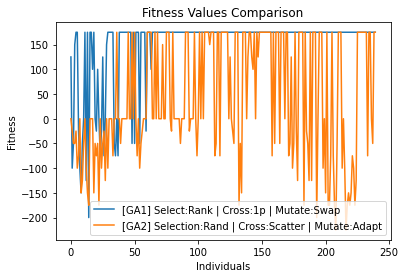

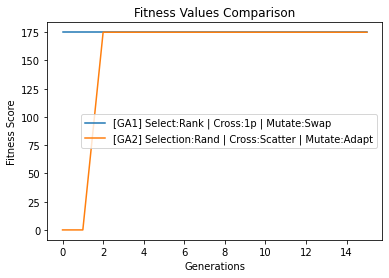

In [170]:
#get solution fitness of both GAs
fit1 = ga_instance1.solutions_fitness
fit2 = ga_instance2.solutions_fitness

#create figure
fig, ax = plt.subplots()

# Plot fitness values
ax.plot(range(len(fit1)), fit1, label="[GA1] Select:Rank | Cross:1p | Mutate:Swap")
ax.plot(range(len(fit2)), fit2, label="[GA2] Selection:Rand | Cross:Scatter | Mutate:Adapt")

# Set plot title and labels
ax.set_title("Fitness Values Comparison")
ax.set_xlabel("Individuals")
ax.set_ylabel("Fitness")

# Add legend
ax.legend()
plt.show()

#get best solutions fitness
best1 = ga_instance1.best_solutions_fitness
best2 = ga_instance2.best_solutions_fitness

#create figure
fig, ax = plt.subplots()

# Plot fitness values
ax.plot(range(len(best1)), best1, label="[GA1] Select:Rank | Cross:1p | Mutate:Swap")
ax.plot(range(len(best2)), best2, label="[GA2] Selection:Rand | Cross:Scatter | Mutate:Adapt")

# Set plot title and labels
ax.set_title("Fitness Values Comparison")
ax.set_xlabel("Generations")
ax.set_ylabel("Fitness Score")

# Add legend
ax.legend()
plt.show()

In [171]:
#printing solutions
print("|Selection: Rank | Crossover: Single-Point | Mutation: Swap|")
print("Best solution: ", printBestSol(ga_instance1.best_solution()))
print("\n++++++++++++++++++++++POSSIBLE VALID SOLUTIONS++++++++++++++++++++++++++\n")
printSolutions(ga_instance1.best_solutions,ga_instance1)

|Selection: Rank | Crossover: Single-Point | Mutation: Swap|
Best solution:  ('Items:', [('2B Pencil', 1.0), ('Color Pencil', 3.0), ('Milo Packet', 1.0), ('Mini Sketch Book', 2.0)], ' SumPrice=', 7.0, ' TotalCost=', 200.0)

++++++++++++++++++++++POSSIBLE VALID SOLUTIONS++++++++++++++++++++++++++

Set 1 : [('Chipsmore Biscuit', 2.0), ('2B Pencil', 1.0), ('Color Pencil', 3.0), ('Milo Packet', 1.0)] 
	SumPrice= 7.0 
	Total Cost= 200.0 

Set 2 : [('2B Pencil', 1.0), ('Magic Pen', 3.0), ('Potato Chip', 2.0), ('Milo Packet', 1.0)] 
	SumPrice= 7.0 
	Total Cost= 200.0 

Set 3 : [('2B Pencil', 1.0), ('Magic Pen', 3.0), ('Potato Chip', 2.0), ('Milo Packet', 1.0)] 
	SumPrice= 7.0 
	Total Cost= 200.0 

Set 4 : [('Chipsmore Biscuit', 2.0), ('2B Pencil', 1.0), ('Magic Pen', 3.0), ('Milo Packet', 1.0)] 
	SumPrice= 7.0 
	Total Cost= 200.0 

Set 5 : [('2B Pencil', 1.0), ('Magic Pen', 3.0), ('Milo Packet', 1.0), ('Mini Sketch Book', 2.0)] 
	SumPrice= 7.0 
	Total Cost= 200.0 

Set 6 : [('2B Pencil', 1.0)

In [172]:
print("=========================================================================")
print("|Selection: Random | Crossover: Scattered | Mutation: Adaptive|")
print("Best solution: ", printBestSol(ga_instance2.best_solution()))
print("\n++++++++++++++++++++++POSSIBLE VALID SOLUTIONS++++++++++++++++++++++++++\n")
printSolutions(ga_instance2.best_solutions,ga_instance2)

|Selection: Random | Crossover: Scattered | Mutation: Adaptive|
Best solution:  ('Items:', [('Chipsmore Biscuit', 2.0), ('2B Pencil', 1.0), ('Color Pencil', 3.0), ('Milo Packet', 1.0)], ' SumPrice=', 7.0, ' TotalCost=', 200.0)

++++++++++++++++++++++POSSIBLE VALID SOLUTIONS++++++++++++++++++++++++++

Set 1 : [('Chipsmore Biscuit', 2.0), ('2B Pencil', 1.0), ('Color Pencil', 3.0), ('Milo Packet', 1.0)] 
	SumPrice= 7.0 
	Total Cost= 200.0 

Set 2 : [('Chipsmore Biscuit', 2.0), ('2B Pencil', 1.0), ('Color Pencil', 3.0), ('Milo Packet', 1.0)] 
	SumPrice= 7.0 
	Total Cost= 200.0 

Set 3 : [('Color Pencil', 3.0), ('Magic Pen', 3.0), ('Milo Packet', 1.0)] 
	SumPrice= 7.0 
	Total Cost= 200.0 

Set 4 : [('Chipsmore Biscuit', 2.0), ('2B Pencil', 1.0), ('Color Pencil', 3.0), ('Milo Packet', 1.0)] 
	SumPrice= 7.0 
	Total Cost= 200.0 

Set 5 : [('Chipsmore Biscuit', 2.0), ('2B Pencil', 1.0), ('Color Pencil', 3.0), ('Milo Packet', 1.0)] 
	SumPrice= 7.0 
	Total Cost= 200.0 

Set 6 : [('Chipsmore Biscu